import required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read the csv file

In [30]:
df_zipf = pd.read_csv('ArArzSingleWordsRankedCSV.csv')

# Filter out entries where 'Freq in AR' is 0
df_zipf = df_zipf[df_zipf['Freq in AR'] > 0]
df_zipf = df_zipf.iloc[::500, :]


In [31]:
# Extract the frequencies and ranks for Corpus A
freq_ar = df_zipf['Freq in AR'].values
rank_ar = df_zipf['RankAr'].values

# Take the logarithm of the frequencies and ranks
log_freq_ar = np.log10(freq_ar)
log_rank_ar = np.log10(rank_ar)

# Use numpy.polyfit to fit a line to the log-transformed frequencies and ranks
# The function returns the coefficients [k, log(c)] of the fitted polynomial
k, log_c = np.polyfit(log_rank_ar, log_freq_ar, 1)

# Calculate c from log(c)
c = 10**log_c

c = 508930137.60958606 k = -1.4734326426526032 log_c = 8.7066581695017


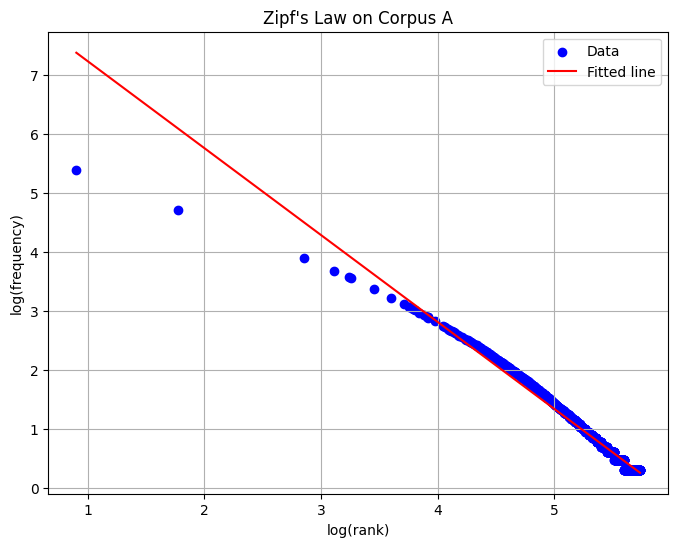

In [32]:
# Print the constants c and k
print("c =", c, "k =", k, 'log_c =', log_c)

# Plot the fitted line and the data points
plt.figure(figsize=(8, 6))
plt.scatter(log_rank_ar, log_freq_ar, color='blue', label='Data')
plt.plot(log_rank_ar, log_c + k * log_rank_ar, color='red', linestyle='-', label='Fitted line')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title('Zipf\'s Law on Corpus A')
plt.grid(True)
plt.legend(loc='best')
plt.show()